In [224]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



#Importing warnings
import warnings
warnings.filterwarnings('ignore')

In [225]:
#loading the dataset
df =pd.read_csv("SpaceServerDataset.csv")

In [226]:
#EDA

In [227]:
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid,class
0,1.240000e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.720000e+18,-0.000009,3306,54922,491,STAR
1,1.240000e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.640000e+17,-0.000055,323,51615,541,STAR
2,1.240000e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.230000e+17,0.123111,287,52023,513,GALAXY
3,1.240000e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.720000e+18,-0.000111,3306,54922,510,STAR
4,1.240000e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.720000e+18,0.000590,3306,54922,512,STAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.240000e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.030000e+17,0.027583,447,51877,246,GALAXY
9996,1.240000e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.030000e+17,0.117772,447,51877,228,GALAXY
9997,1.240000e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.220000e+18,-0.000402,7303,57013,622,STAR
9998,1.240000e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.030000e+17,0.014019,447,51877,229,GALAXY


In [228]:
df.shape

(10000, 18)

In [229]:
duplicate = df[df.duplicated()] 
duplicate

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid,class


In [230]:
print(df.columns)

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'redshift', 'plate', 'mjd', 'fiberid', 'class'],
      dtype='object')


In [231]:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
redshift     float64
plate          int64
mjd            int64
fiberid        int64
class         object
dtype: object

In [232]:
df.isnull().values.any()

False

In [233]:
df['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

In [234]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#df['city']=le.fit_transform(df['city'])

list1=['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'redshift', 'plate', 'mjd', 'fiberid', 'class']
for val in list1:
   df[val]=le.fit_transform(df[val].astype(str))

In [235]:
df.dtypes

objid        int32
ra           int32
dec          int32
u            int32
g            int32
r            int32
i            int32
z            int32
run          int32
rerun        int32
camcol       int32
field        int32
specobjid    int32
redshift     int32
plate        int32
mjd          int32
fiberid      int32
class        int32
dtype: object

In [236]:
df['class'].unique()

array([2, 0, 1])

Text(0.5, 1.0, 'correlation with target variable')

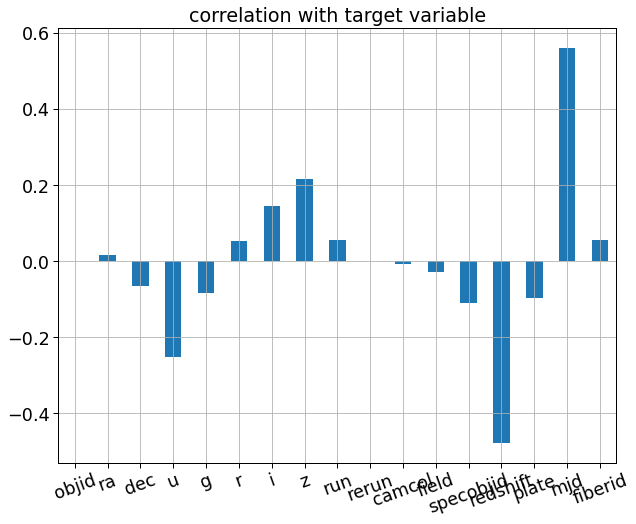

In [237]:
#checking correlation with the target variable
plt.figure(figsize=(10,8))
df.drop('class',axis=1).corrwith(df['class']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title("correlation with target variable")

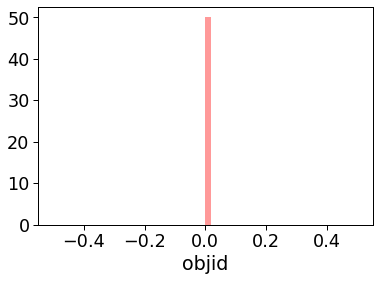

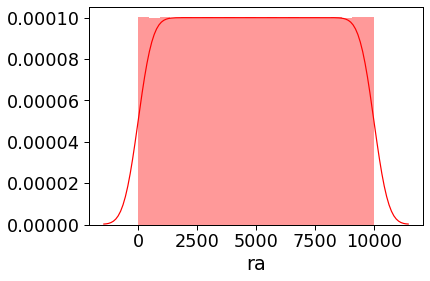

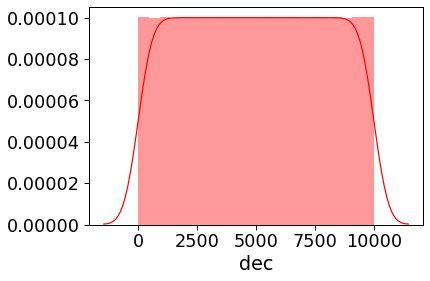

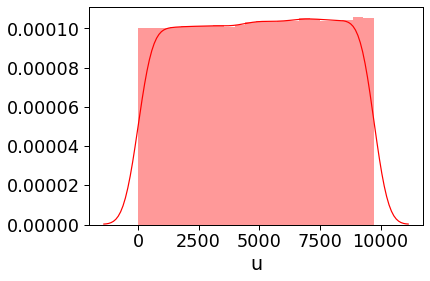

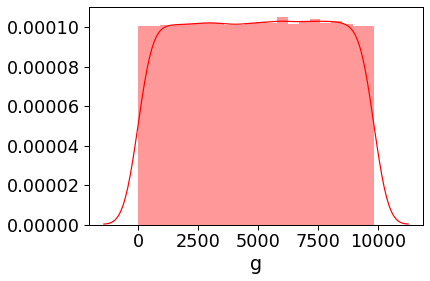

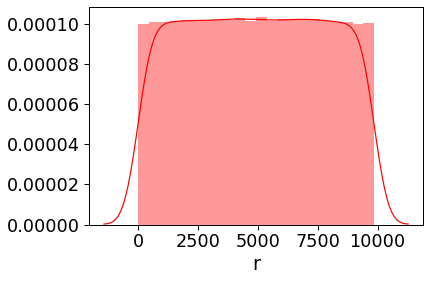

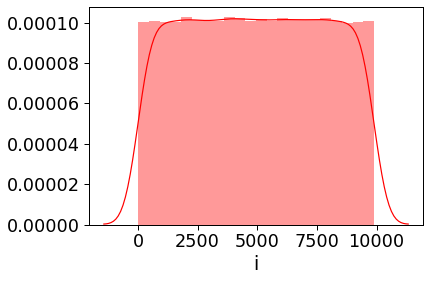

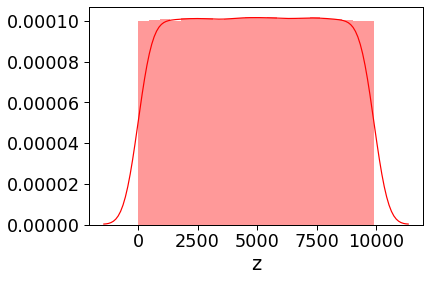

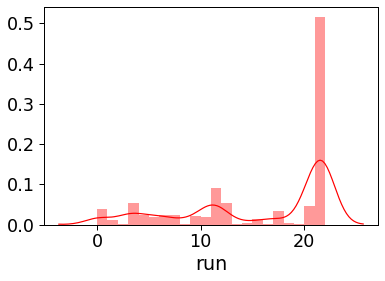

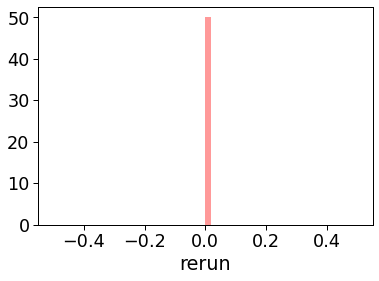

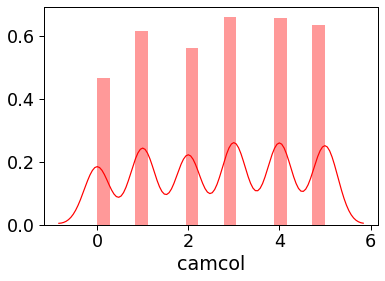

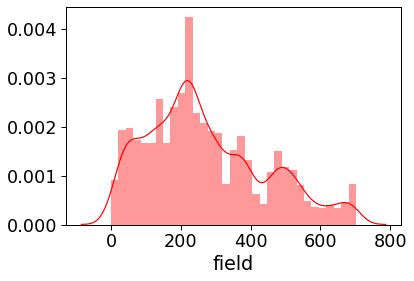

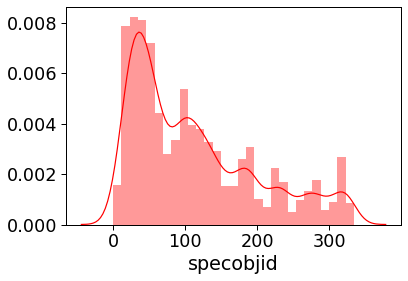

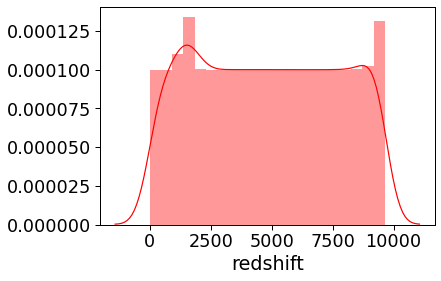

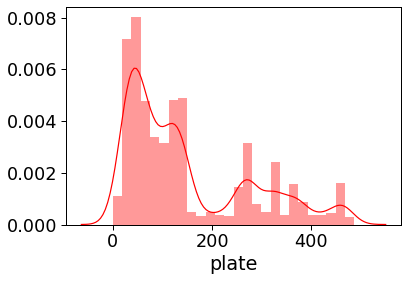

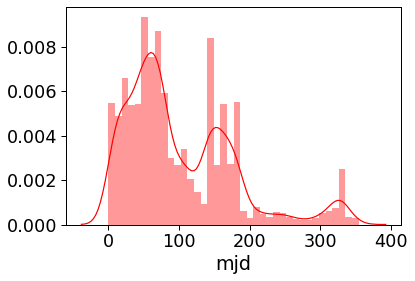

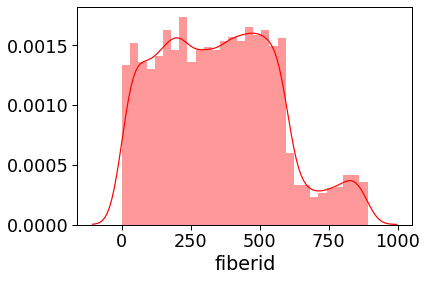

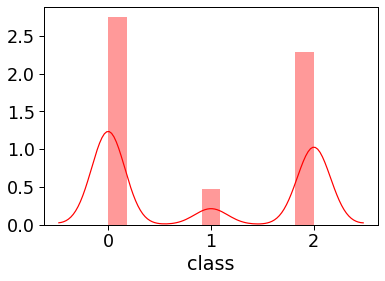

In [238]:
for col in df.describe().columns:
    sns.distplot(df[col],color='r')
    plt.show()

In [239]:
df.skew()

objid        0.000000
ra           0.000000
dec          0.000000
u           -0.021847
g           -0.006730
r            0.000088
i            0.000009
z           -0.000981
run         -0.778519
rerun        0.000000
camcol      -0.100220
field        0.607764
specobjid    0.906240
redshift     0.027719
plate        1.019614
mjd          1.177842
fiberid      0.357997
class        0.169292
dtype: float64

In [240]:
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid,class
0,0,4997,4030,8818,3143,1853,1594,1474,21,0,3,183,102,1680,120,182,436,2
1,0,5011,4145,4066,3722,4220,4703,4956,21,0,3,183,92,1499,110,6,492,2
2,0,5024,4118,8203,8155,7210,6793,6350,21,0,3,184,45,7715,55,80,461,0
3,0,5077,3910,1569,1960,2431,2897,3415,21,0,3,185,102,72,120,182,458,2
4,0,5081,4064,1206,1255,3347,4943,5701,21,0,3,185,102,2994,120,182,460,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,892,8185,4765,4816,5129,5367,5339,11,0,2,67,189,3617,275,37,164,0
9996,0,891,8198,2765,4665,5707,5488,6007,11,0,2,68,189,7582,275,37,144,0
9997,0,908,8196,4467,6285,7400,7927,8097,11,0,2,68,315,855,445,341,582,2
9998,0,903,8204,5071,6921,7442,7735,7408,11,0,2,69,189,3374,275,37,145,0


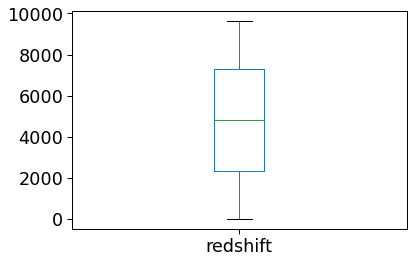

In [241]:
df['redshift'].plot.box()

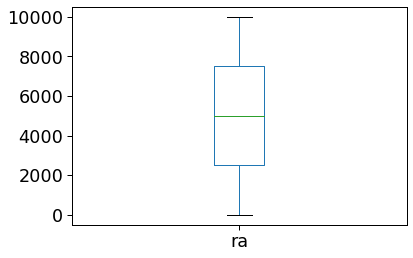

In [242]:
df['ra'].plot.box()

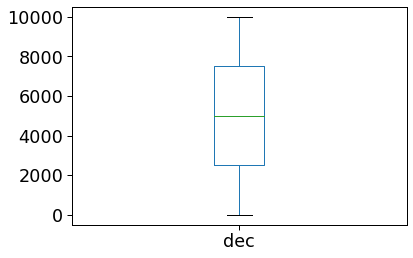

In [243]:
df['dec'].plot.box()

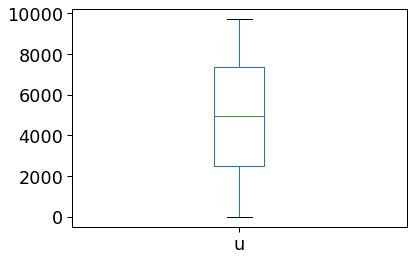

In [244]:
df['u'].plot.box()

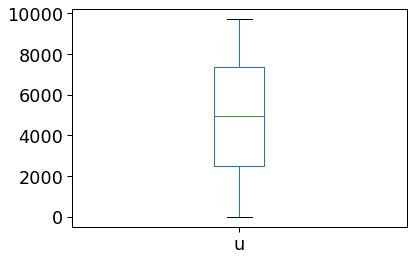

In [245]:
df['u'].plot.box()

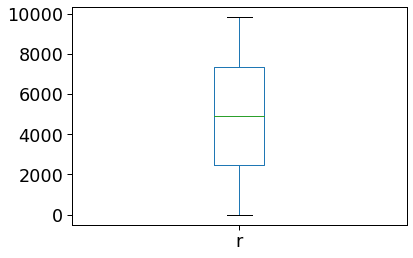

In [246]:
df['r'].plot.box()

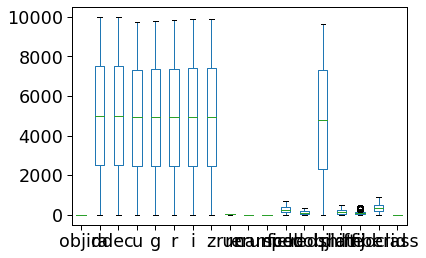

In [247]:
df.plot.box()

In [248]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
redshift     0
plate        0
mjd          0
fiberid      0
class        0
dtype: int64

In [249]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'redshift', 'plate', 'mjd', 'fiberid', 'class'],
      dtype='object')

<Figure size 2736x1872 with 0 Axes>

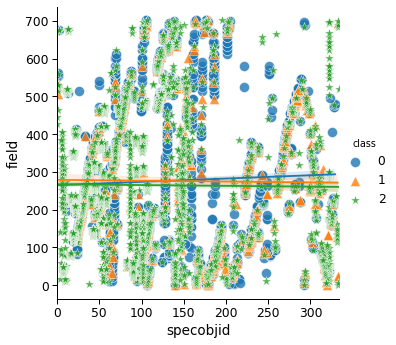

In [250]:
plt.figure(figsize=(38,26))
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='specobjid',y='field', hue='class', data=df, markers=['o','^','*'],scatter_kws={'s':100, 'linewidth':0.5,'edgecolor':'w'})

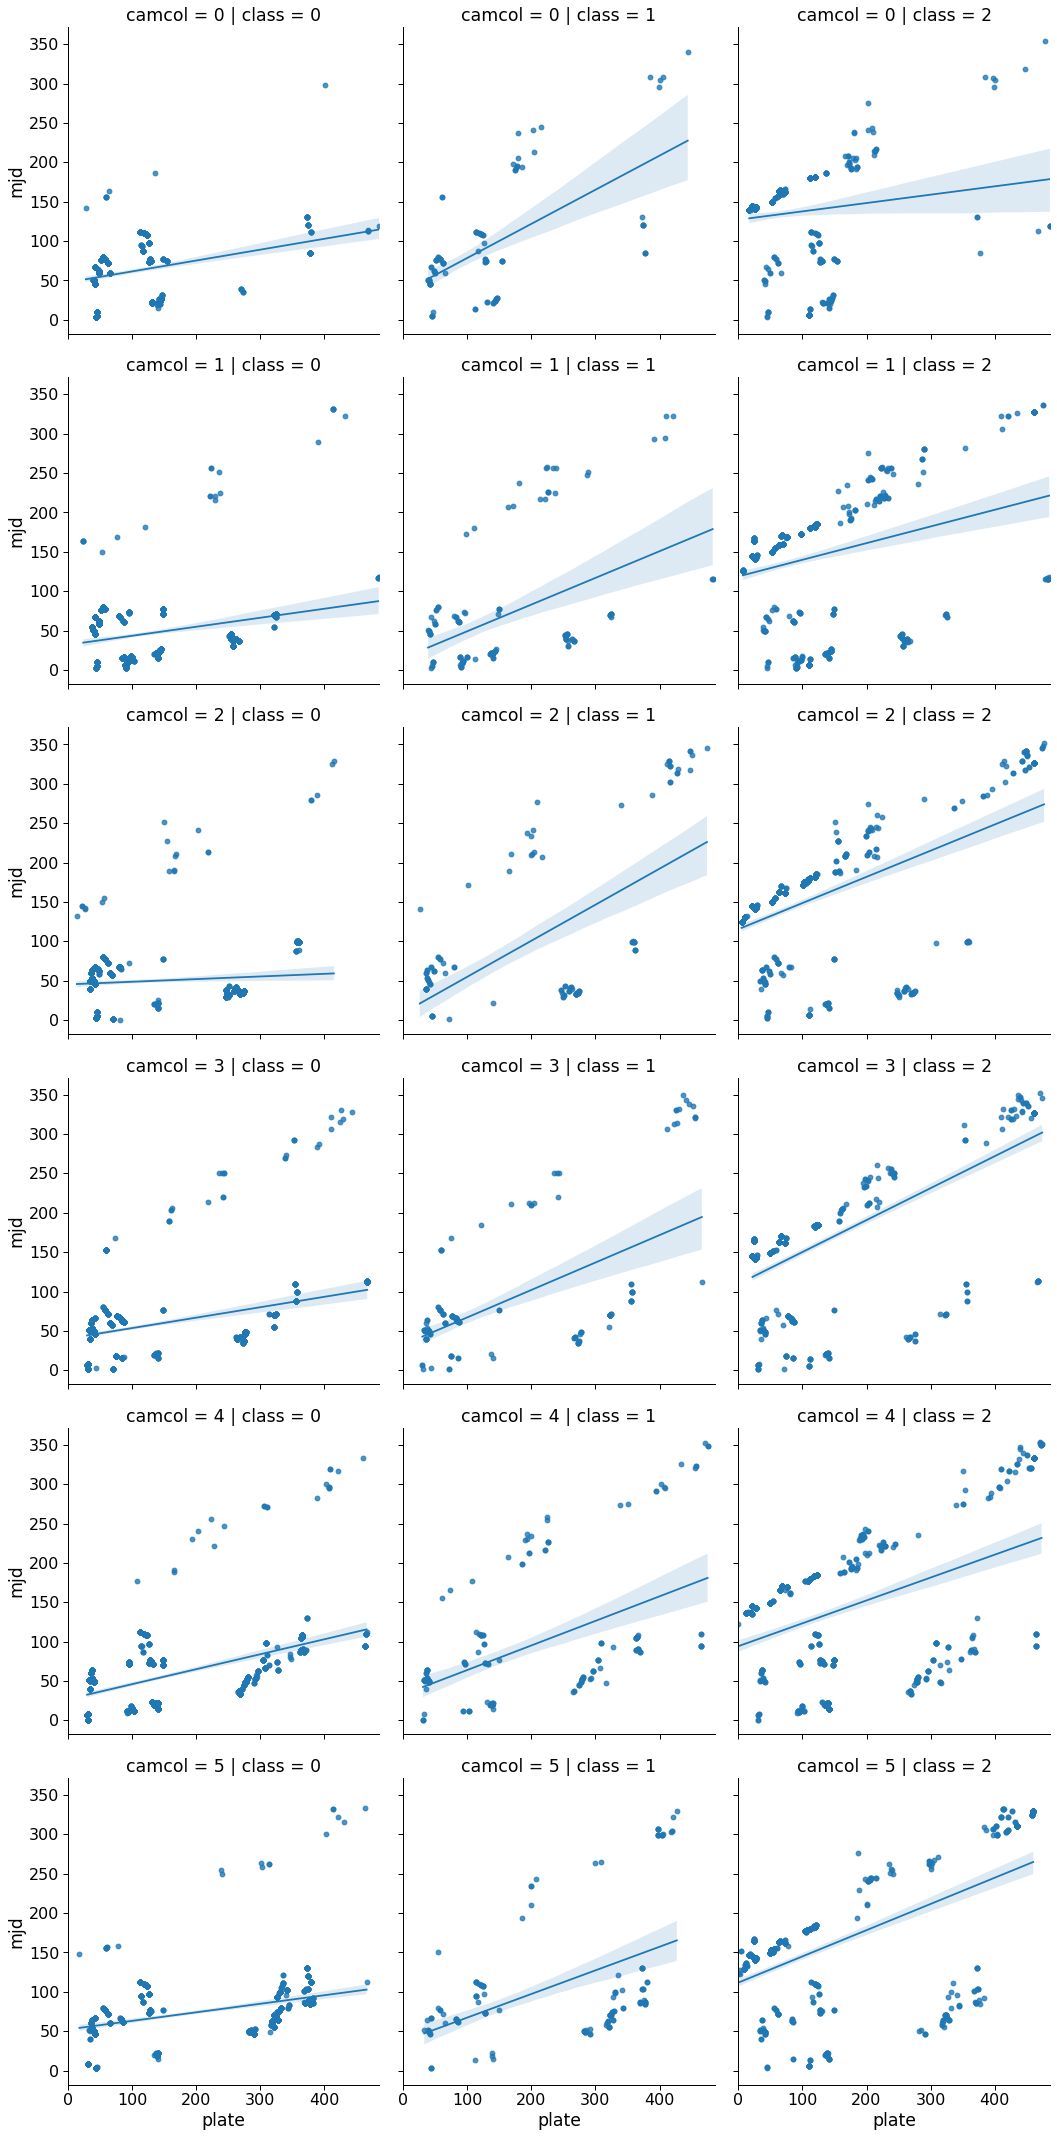

In [251]:
sns.set_context('paper', font_scale=1.8)
sns.lmplot(x='plate',y='mjd',col='class',row='camcol',data=df)

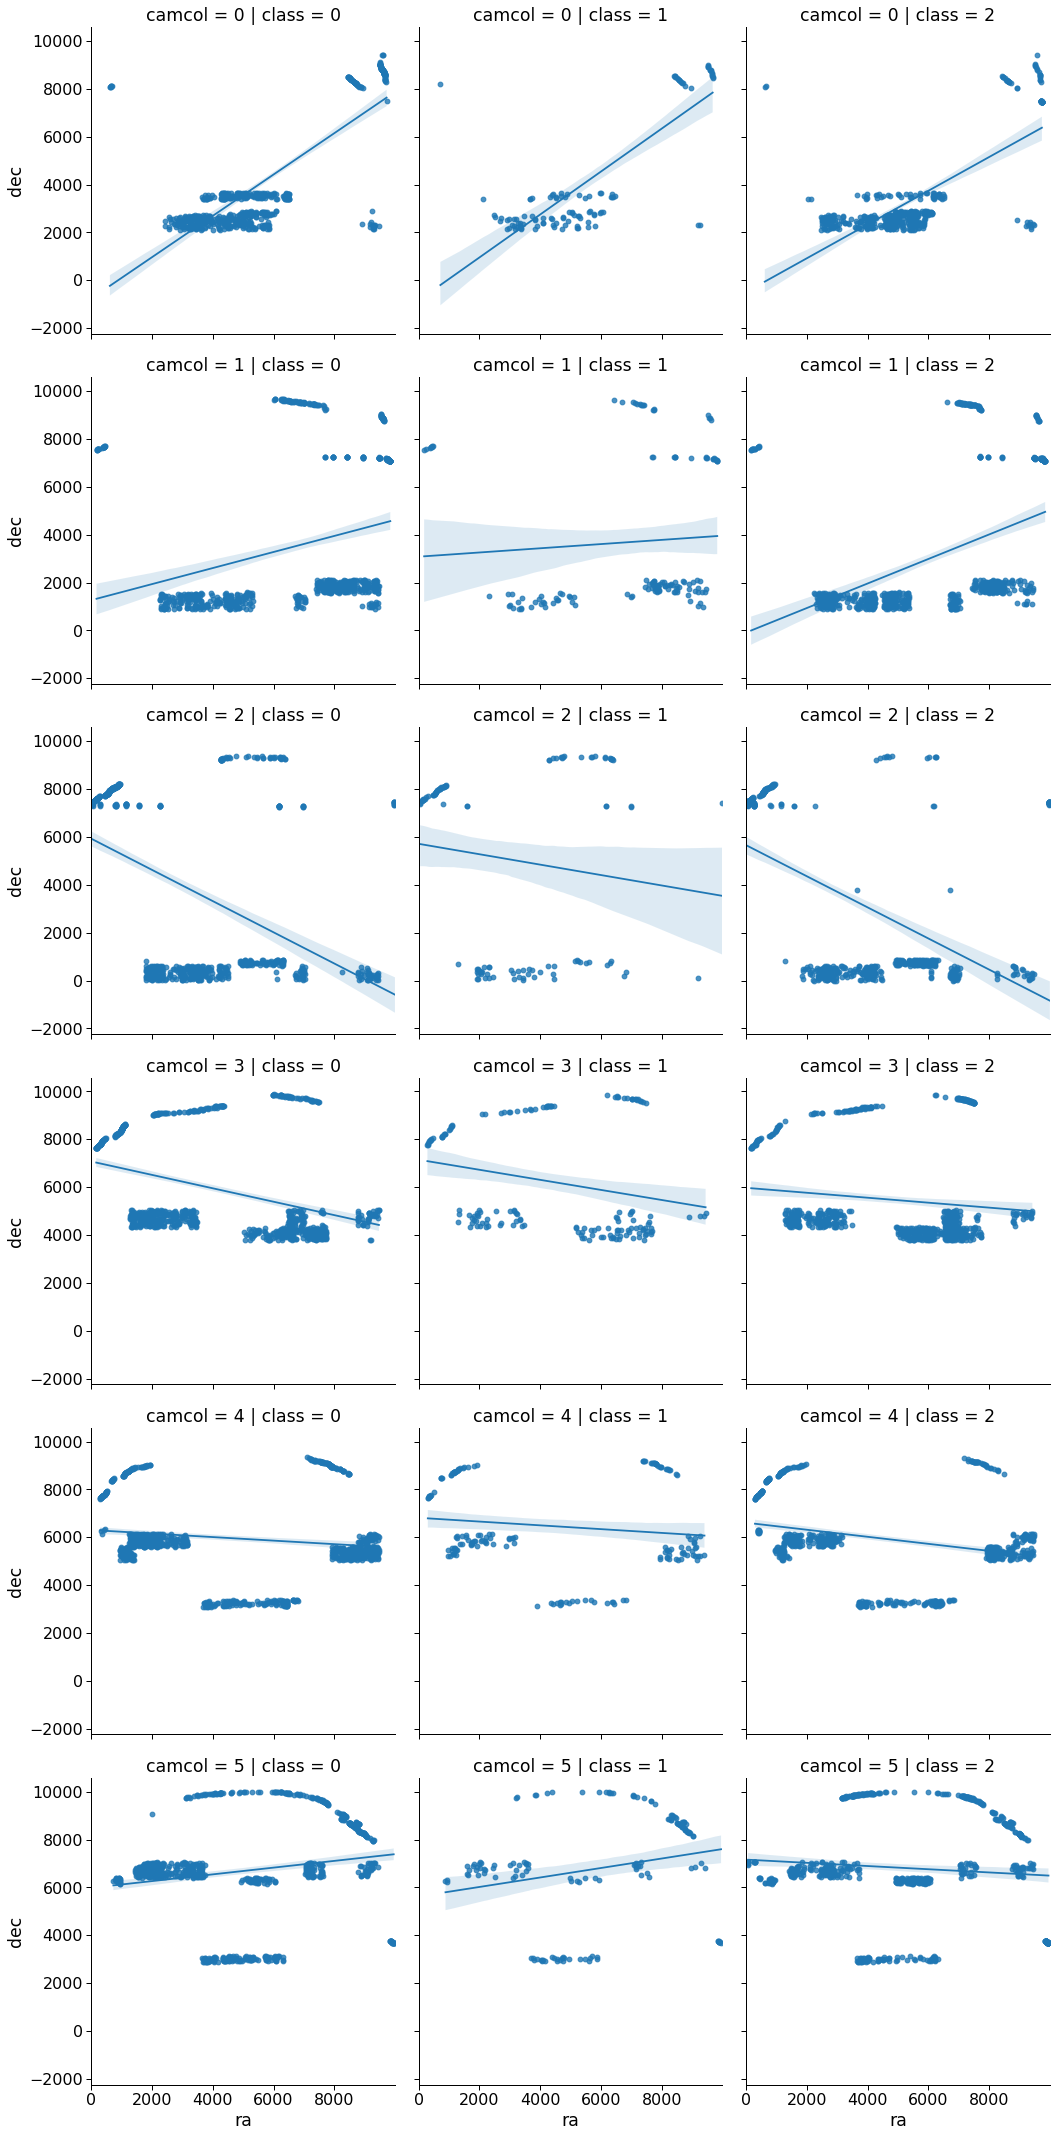

In [252]:
sns.set_context('paper', font_scale=1.8)
sns.lmplot(x='ra',y='dec',col='class',row='camcol',data=df)

Text(0.5, 1.0, 'correlation with target variable')

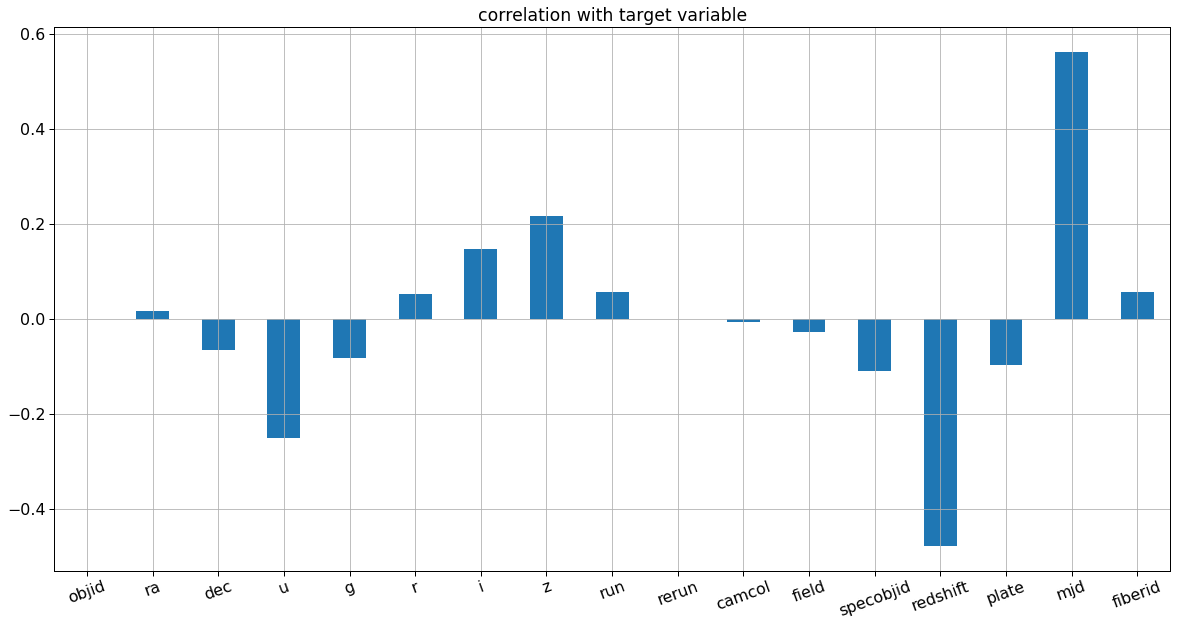

In [253]:
#checking correlation with the target variable
plt.figure(figsize=(20,10))
df.drop('class',axis=1).corrwith(df['class']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title("correlation with target variable")

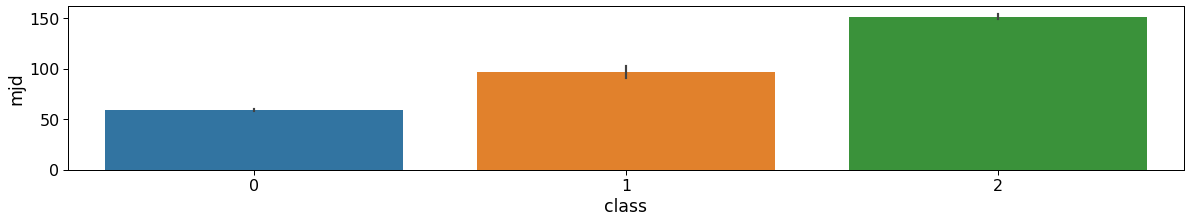

In [254]:
plt.figure(figsize=(20,3))
sns.barplot(x='class',y='mjd', data=df)
sns.set_context('paper', font_scale=2)

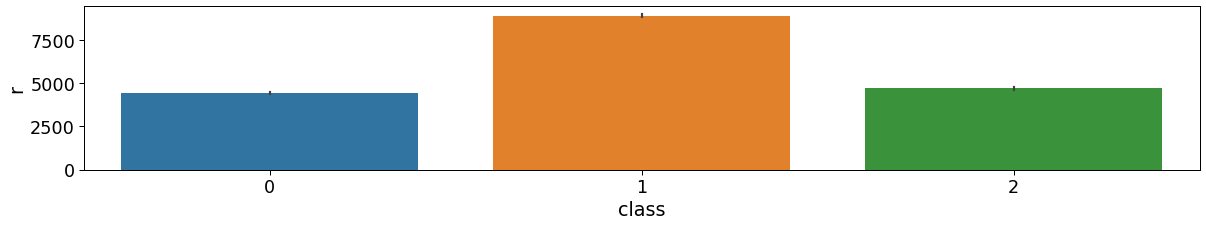

In [255]:
plt.figure(figsize=(20,3))
sns.barplot(x='class',y='r', data=df)
sns.set_context('paper', font_scale=2)

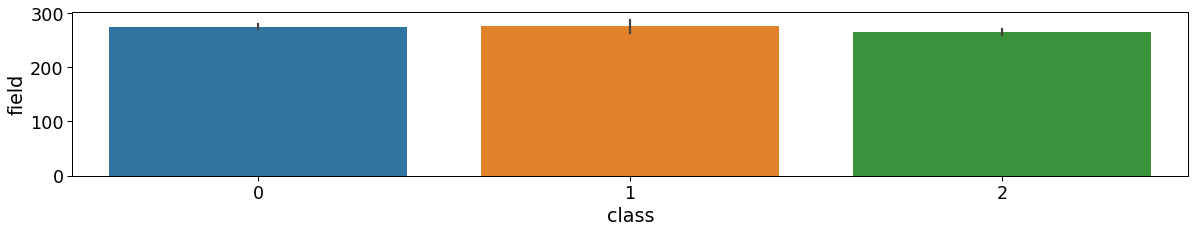

In [256]:
plt.figure(figsize=(20,3))
sns.barplot(x='class',y='field', data=df)
sns.set_context('paper', font_scale=2)

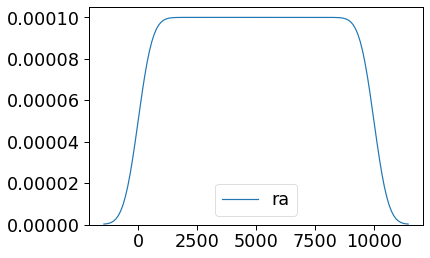

In [258]:
sns.kdeplot(df['ra'])

In [259]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'redshift', 'plate', 'mjd', 'fiberid', 'class'],
      dtype='object')

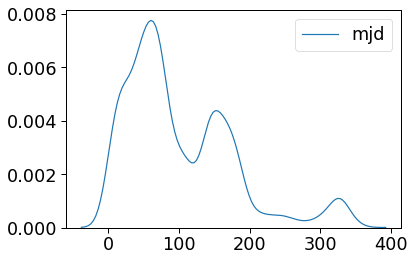

In [260]:
sns.kdeplot(df['mjd'])

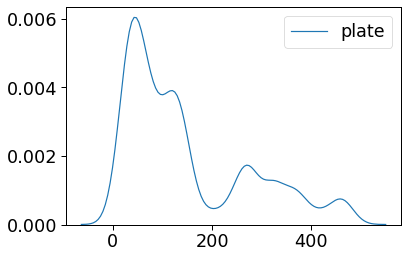

In [261]:
sns.kdeplot(df['plate'])

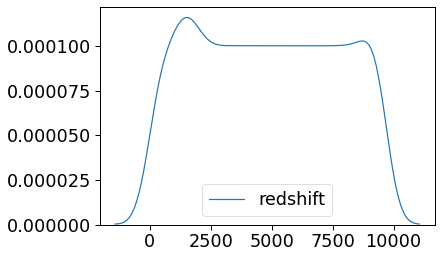

In [262]:
sns.kdeplot(df['redshift'])

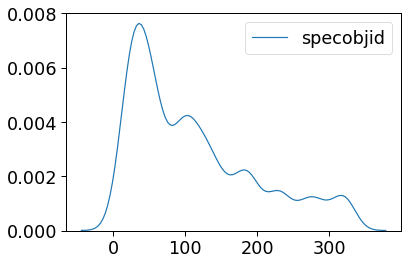

In [263]:
sns.kdeplot(df['specobjid'])

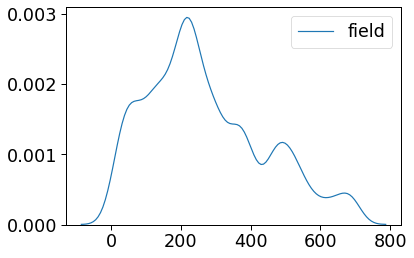

In [264]:
sns.kdeplot(df['field'])

In [265]:
#splitting the trining set and test set

In [266]:
X=df.iloc[:, :-1]
X.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,0,4997,4030,8818,3143,1853,1594,1474,21,0,3,183,102,1680,120,182,436
1,0,5011,4145,4066,3722,4220,4703,4956,21,0,3,183,92,1499,110,6,492
2,0,5024,4118,8203,8155,7210,6793,6350,21,0,3,184,45,7715,55,80,461
3,0,5077,3910,1569,1960,2431,2897,3415,21,0,3,185,102,72,120,182,458
4,0,5081,4064,1206,1255,3347,4943,5701,21,0,3,185,102,2994,120,182,460


In [267]:
y=df.iloc[:,-1]
y.head()

0    2
1    2
2    0
3    2
4    2
Name: class, dtype: int32

In [268]:
from sklearn.preprocessing import StandardScaler

In [269]:
ss= StandardScaler()
X= ss.fit_transform(X)

In [270]:
print(X.shape,'\t\t',y.shape)

(10000, 17) 		 (10000,)


In [271]:
from sklearn.model_selection import train_test_split,cross_val_score

In [272]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=9,stratify=y)

In [273]:
print(X_train.shape,X_test.shape)

(7000, 17) (3000, 17)


In [274]:
print(y_train.shape,y_test.shape)

(7000,) (3000,)


In [275]:
# THINK WHICH MODEL CAN BE APPLIED OVER THE DATASET

In [276]:
#importing all the model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [277]:
#importing all the Bossting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [278]:
#importing error metrics

In [279]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score

In [280]:
KNN = KNeighborsClassifier(n_neighbors=4)
SV=SVC()

In [281]:
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=4)
GNB=GaussianNB()

In [282]:
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))

In [283]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [284]:
Model = []
score = []
cvs = []
rocscore =[]
rocscore = []

In [285]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [286]:
model=[BaggingClassifier(),ExtraTreesClassifier()]

In [287]:
for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    pre=m.predict(X_test)
    print('accuracy',m)
    print(accuracy_score(y_test,pre))
    print(confusion_matrix(y_test,pre))
    print('*************************')


accuracy BaggingClassifier()
0.9813333333333333
[[1481    9    9]
 [  20  228    7]
 [   4    7 1235]]
*************************
accuracy ExtraTreesClassifier()
0.979
[[1478    4   17]
 [  16  232    7]
 [  12    7 1227]]
*************************


In [288]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [289]:
# training a linear SVM classifier 
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test)

In [290]:
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 

In [291]:
report=classification_report(y_test, svm_predictions)

In [292]:
accuracy

0.9283333333333333

In [293]:
cm

array([[1412,    6,   81],
       [  16,  228,   11],
       [  74,   27, 1145]], dtype=int64)

In [294]:
report

'              precision    recall  f1-score   support\n\n           0       0.94      0.94      0.94      1499\n           1       0.87      0.89      0.88       255\n           2       0.93      0.92      0.92      1246\n\n    accuracy                           0.93      3000\n   macro avg       0.91      0.92      0.92      3000\nweighted avg       0.93      0.93      0.93      3000\n'

In [295]:
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 

In [296]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
  
accuracy

0.9246666666666666

In [297]:
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions) 

In [298]:
cm

array([[1453,   16,   30],
       [  29,  215,   11],
       [ 122,   18, 1106]], dtype=int64)

In [299]:
report=classification_report(y_test, knn_predictions) 

In [300]:
report

'              precision    recall  f1-score   support\n\n           0       0.91      0.97      0.94      1499\n           1       0.86      0.84      0.85       255\n           2       0.96      0.89      0.92      1246\n\n    accuracy                           0.92      3000\n   macro avg       0.91      0.90      0.90      3000\nweighted avg       0.93      0.92      0.92      3000\n'

In [301]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1491    7    1]
 [  17  233    5]
 [   0    6 1240]]


0.988

In [302]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 98.69 %
Standard Deviation: 0.48 %


In [303]:
#saving this model 
import joblib

#saving the model as a pickle in a file
joblib.dump(SV,'space.plk')

['space.plk']